In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
google = pd.read_csv('drive/MyDrive/GOOG.csv', sep=None)
google.head()

<ipython-input-2-b02f5a602a31>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  google = pd.read_csv('drive/MyDrive/GOOG.csv', sep=None)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [ ]:
# google.columns = [
#     "Date",
#     "Open",
#     "High",
#     "Low",
#     "Close",
#     "Adj Close",
#     "Volume"
# ]
# google = google.drop(0)
# google.head()

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4858 non-null   object 
 1   Open       4858 non-null   float64
 2   High       4858 non-null   float64
 3   Low        4858 non-null   float64
 4   Close      4858 non-null   float64
 5   Adj Close  4858 non-null   float64
 6   Volume     4858 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 265.8+ KB


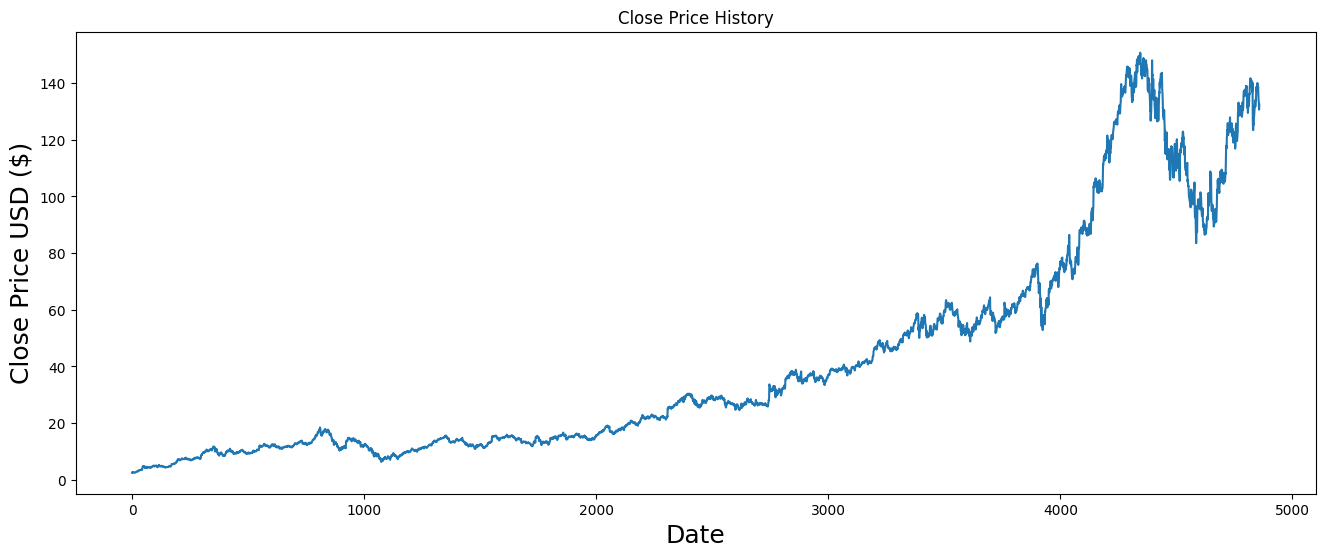

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(google['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4858.000000,4858.000000,4858.000000,4858.000000,4858.000000,4.858000e+03
mean,41.477174,41.917059,41.055491,41.494404,41.494404,1.189152e+08
std,38.590695,39.031758,38.193016,38.618107,38.618107,1.512424e+08
min,2.470490,2.534002,2.390042,2.490913,2.490913,1.584340e+05
25%,12.846597,12.954195,12.712414,12.834642,12.834642,2.854912e+07
50%,26.499958,26.728268,26.289323,26.537501,26.537501,6.168836e+07
75%,57.367250,58.028500,56.962251,57.611249,57.611249,1.467329e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [ ]:
correlation = google.corr()
correlation

<ipython-input-7-97cece249fa6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = google.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999903,0.999896,0.999774,0.999774,-0.471746
High,0.999903,1.000000,0.999875,0.999894,0.999894,-0.470766
Low,0.999896,0.999875,1.000000,0.999904,0.999904,-0.473027
Close,0.999774,0.999894,0.999904,1.000000,1.000000,-0.472017
Adj Close,0.999774,0.999894,0.999904,1.000000,1.000000,-0.472017
Volume,-0.471746,-0.470766,-0.473027,-0.472017,-0.472017,1.000000


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_set, test_set= np.split(google, [int(.8 *len(google))])
train_set = train_set.values
test_set = test_set.values
train_set[0][4] #temos q remover as colunas 4 e 5 do train e colocar no teste

2.499133

In [ ]:
x_train = train_set
y_train = train_set
x_train = np.delete(train_set, 4, 1)  # delete fourth column
x_train = np.delete(x_train, 4, 1)
x_train = np.delete(x_train,0,1)
x_train

array([[2.490664, 2.591785, 2.390042, 897427216],
       [2.51582, 2.716817, 2.503118, 458857488],
       [2.758411, 2.826406, 2.71607, 366857939],
       ...,
       [74.382004, 74.776001, 74.105003, 27024000],
       [74.679497, 74.77475, 73.262497, 35692000],
       [71.550003, 71.903503, 71.059998, 35104000]], dtype=object)

In [ ]:
y_train = np.delete(train_set,0,1)
y_train = np.delete(y_train,0,1)
y_train = np.delete(y_train,0,1)
y_train = np.delete(y_train,0,1)
y_train = np.delete(y_train,1,1)
y_train = np.delete(y_train,1,1)
y_train

array([[2.499133],
       [2.697639],
       [2.724787],
       ...,
       [74.332497],
       [73.335503],
       [71.695]], dtype=object)

In [ ]:
x_test = test_set
y_test = test_set
x_test = np.delete(test_set, 4, 1)  # delete fourth column
x_test = np.delete(x_test, 4, 1)
x_test = np.delete(x_test,0,1)
x_test

array([[72.150002, 72.800003, 71.623497, 31548000],
       [72.940002, 73.2715, 72.336998, 21554000],
       [71.998001, 72.863998, 71.82, 26788000],
       ...,
       [133.320007, 133.5, 132.151993, 24258400],
       [131.294006, 131.449997, 129.399994, 24117100],
       [130.369995, 133.539993, 129.729996, 19216500]], dtype=object)

In [ ]:
y_test = np.delete(test_set,0,1)
y_test = np.delete(y_test,0,1)
y_test = np.delete(y_test,0,1)
y_test = np.delete(y_test,0,1)
y_test = np.delete(y_test,1,1)
y_test = np.delete(y_test,1,1)
y_test

array([[72.627998],
       [72.931503],
       [72.792],
       [71.711502],
       [74.296997],
       [72.3535],
       [72.411499],
       [73.811501],
       [73.961502],
       [75.433998],
       [75.439499],
       [75.913498],
       [75.733002],
       [76.037003],
       [75.983498],
       [76.334503],
       [75.907501],
       [74.255501],
       [71.079498],
       [69.422501],
       [69.658997],
       [65.904503],
       [66.966499],
       [69.455498],
       [67.069504],
       [69.325996],
       [65.952003],
       [64.920502],
       [60.778],
       [64.019501],
       [60.7705],
       [55.745499],
       [60.9865],
       [54.216499],
       [55.990002],
       [54.84],
       [55.7645],
       [53.616001],
       [52.831001],
       [56.723],
       [55.1245],
       [58.087502],
       [55.5355],
       [57.341],
       [58.140499],
       [55.280998],
       [56.042],
       [54.894001],
       [59.346001],
       [59.3255],
       [60.514],
       [60.57249

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3886, 4)
(3886, 1)
(972, 4)
(972, 1)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
#scaled_data = scaler.fit_transform(dataset)
x_train = x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)
x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100, random_state=42)

In [ ]:
y_pred = np.zeros((972,1))
for i in range (0,972):
  model.fit(x_train,y_train)
  y_pred[i] = model.predict(x_test)[i]
  x_train = np.vstack((x_train,x_test[i]))
  y_train = np.vstack((y_train,y_test[i]))

<ipython-input-44-26b8a456f60d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-44-26b8a456f60d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-44-26b8a456f60d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-44-26b8a456f60d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)
<ipython-input-44-26b8a456f60d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [ ]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Erros do RF: ")
print("RMSE: {}" .format(rmse))
print("MAE: {}" .format(mae))
print("R2: {}" .format(r2))

Erros do RF: 
RMSE: 0.010329516118105599
MAE: 0.007875875284605602
R2: 0.9983771804015775


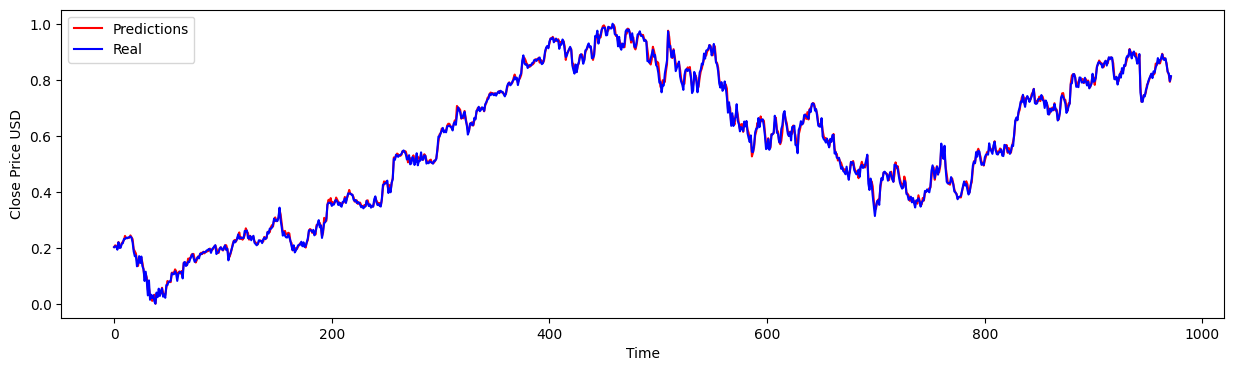

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(y_pred, 'r', label = 'Predictions')
plt.plot(y_test, 'b', label = 'Real')
plt.xlabel("Time")
plt.ylabel("Close Price USD")
plt.legend()
plt.show()

In [ ]:
#  for i in range(3886,4862):
#    x_train = np.delete(x_train,i,axis=0)
#    y_train = np.delete(y_train,i,axis=0)
print(x_train.shape)
print(y_train.shape)

(3886, 4)
(3886, 1)


In [ ]:
from sklearn.neural_network import MLPRegressor

x_train2 = x_train
y_train2 = y_train

model = MLPRegressor(hidden_layer_sizes = 1000, random_state=42)

In [ ]:
y_pred = np.zeros((972,1))
for i in range (0,972):
  model.fit(x_train2,y_train2)
  y_pred[i] = model.predict(x_test)[i]
  x_train2 = np.vstack((x_train2,x_test[i]))
  y_train2 = np.vstack((y_train2,y_test[i]))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed w

In [ ]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Erros do MLP: ")
print("RMSE: {}" .format(rmse))
print("MAE: {}" .format(mae))
print("R2: {}" .format(r2))

Erros do MLP: 
RMSE: 0.011535308627918643
MAE: 0.008873663066830217
R2: 0.9979761947144571


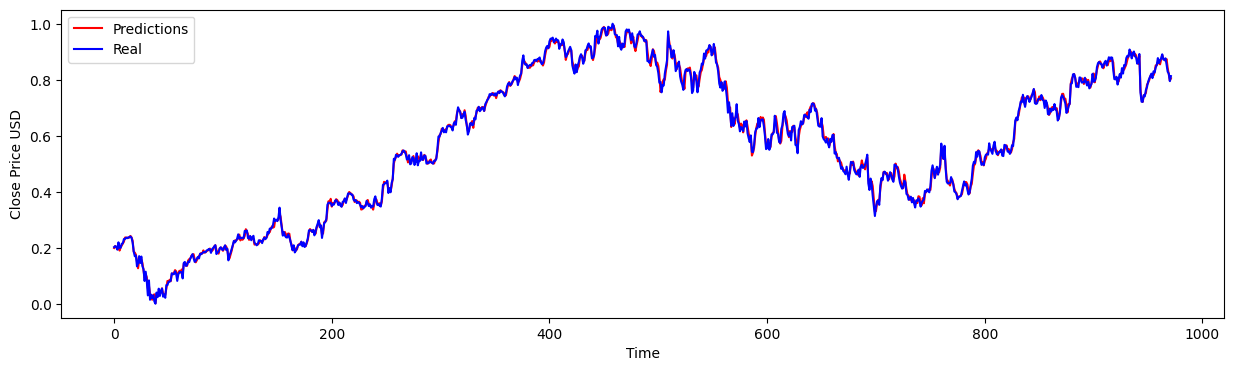

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(y_pred, 'r', label = 'Predictions')
plt.plot(y_test, 'b', label = 'Real')
plt.xlabel("Time")
plt.ylabel("Close Price USD")
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR

x_train2 = x_train
y_train2 = y_train

model = SVR(kernel = "rbf")

In [ ]:
y_pred = np.zeros((972,1))
for i in range (0,972):
  model.fit(x_train2,y_train2)
  y_pred[i] = model.predict(x_test)[i]
  x_train2 = np.vstack((x_train2,x_test[i]))
  y_train2 = np.vstack((y_train2,y_test[i]))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
rmse = sqrt(mean_squared_error(y_test,y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Erros do SVR: ")
print("RMSE: {}" .format(rmse))
print("MAE: {}" .format(mae))
print("R2: {}" .format(r2))

Erros do SVR: 
RMSE: 0.04309990803609265
MAE: 0.03511085388479981
R2: 0.9717471036880037


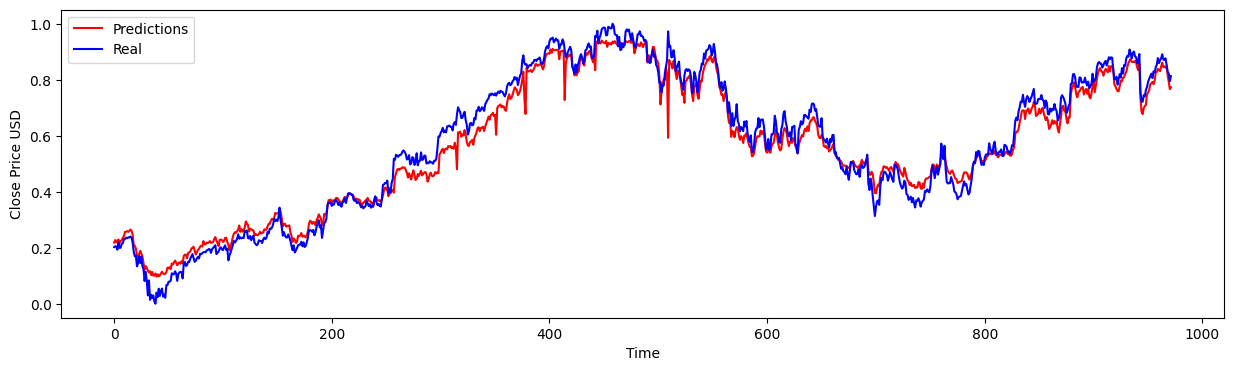

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(y_pred, 'r', label = 'Predictions')
plt.plot(y_test, 'b', label = 'Real')
plt.xlabel("Time")
plt.ylabel("Close Price USD")
plt.legend()
plt.show()